<a href="https://colab.research.google.com/github/kiranmahara9600/Simple-Linear-Regression-implementation/blob/main/Simple_Linear_Regresssion_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



###**Title - Prediction using Supervised ML**


###**Objective :**

* *To build a simple Linear Regression model using just two variables*
* *To predict the percentage of an student based on the no. of study hours using the model*

In [1]:
#importing all the necessary modules required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

**Link to download dataset : http://bit.ly/w-data**

In [2]:
#reading csv data and storing it in studyhrs_score_data
studyhrs_score_data = pd.read_csv('http://bit.ly/w-data')

###**Understanding the data**

In [3]:
#checking the shape of the loaded data
studyhrs_score_data.shape

(25, 2)

*So, we have 25 observations and 2 different features in the data*

In [4]:
#visualising observations of the studyhrs_score_data
studyhrs_score_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


*We can see, there is no any null value in the data*

In [5]:
studyhrs_score_data.rename(columns={'Hours':'Study Hours'},inplace=True)   #renaming column
studyhrs_score_data.head()

,Study Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**To check for distribution and presence of outliers** 

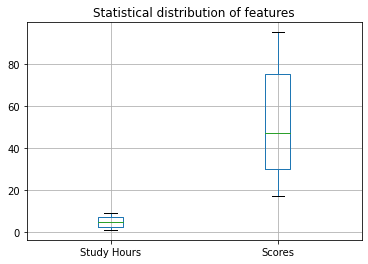

In [6]:
studyhrs_score_data.boxplot()   #to visualise presence of outliers for features
plt.title('Statistical distribution of features')
plt.show()

*No presence of outliers*

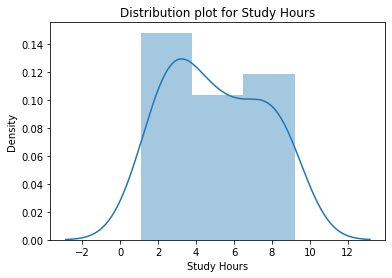

In [7]:
sns.distplot(studyhrs_score_data['Study Hours'])   #to visualise distribution of Study Hours
plt.title('Distribution plot for Study Hours')   #to give title
plt.show()

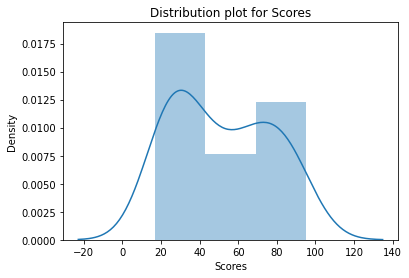

In [8]:
sns.distplot(studyhrs_score_data['Scores'])   #to visualise distribution of Scores
plt.title('Distribution plot for Scores')
plt.show()

*We can see, both of these features are normally distributed, so we can use these features to build linear regression model without any kind of feature transformation*

**Relation between Study Hours and Scores**

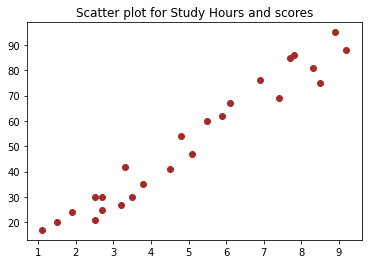

In [9]:
#scatter plot to check relationship between study hours and scores
plt.scatter(studyhrs_score_data['Study Hours'],studyhrs_score_data['Scores'],color='brown')
plt.title('Scatter plot for Study Hours and scores')
plt.show()

**Correlation between Study Hours and Scores**

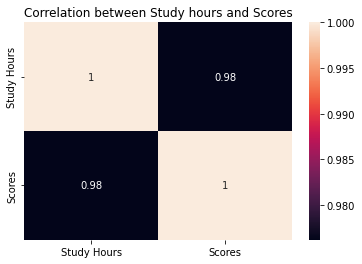

In [10]:
sns.heatmap(studyhrs_score_data.corr(),annot=True)   #to check correlation between features
plt.title('Correlation between Study hours and Scores')
plt.show()

*We can see, there is a high positive linear relation between study hours and scores*

#**Model Building**

In [11]:
X = studyhrs_score_data.iloc[:,:1]   #storing dependent variable values in X
y = studyhrs_score_data['Scores']   #storing independent variable values in y

**Train and Test split**

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=50)   #splitting data into training and test data

**Linear Regression model**

In [13]:
reg = LinearRegression()   
reg.fit(X_train, y_train)

LinearRegression()

**Parameters of model**

In [14]:
#printing parameter values
print('Intercept:' ,reg.intercept_)   
print('Coefficient:',reg.coef_)   

Intercept: 2.810236462826552
Coefficient: [9.59563563]


**Prediction of Scores for train data**

In [15]:
y_train_pred = reg.predict(X_train)   #predicting dependent variable values for training data

In [16]:
#visualising actual and predicted values of dependent variable for training data
actual_predicted_traindata=pd.DataFrame({'Actual':y_train,'Predicted':y_train_pred}).set_index('Actual')
actual_predicted_traindata

,Predicted
Actual,
41,45.990597
81,82.454012
25,28.718453
75,84.373139
69,73.817940
60,55.586232
85,76.696631
27,33.516270
24,21.041944


**Prediction of Scores for test data**

In [17]:
y_pred = reg.predict(X_test)   #predicting dependent variable values for test data

In [18]:
#visualising actual and predicted values of dependent variable for test data
actual_predicted_testdata=pd.DataFrame({'Actual':y_test,'Predicted':y_pred}).set_index('Actual')
actual_predicted_testdata

,Predicted
Actual,
95,88.211394
30,28.718453
76,69.020122
35,39.273652
17,13.365436


**Best fit line**

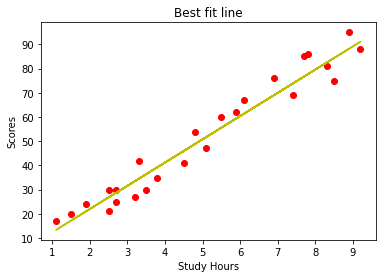

In [19]:
#visualising best fit line
plt.scatter(X,y,color='r')   #scatter plot
reg_line = reg.coef_*X + reg.intercept_   #best fit line equation
plt.plot(X['Study Hours'],reg_line,'y')   #plotting best fit line
plt.title('Best fit line')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.show()

**MSE and RMSE for train data**

In [20]:
#printing MSE and RMSE for train data
print('Mean square error for train data:',mean_squared_error(y_train,y_train_pred))
print('Root mean square error for train data:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

Mean square error for train data: 30.371109247520963
Root mean square error for train data: 5.5109989337252605


**MSE and RMSE for test data**

In [21]:
#printing MSE and RMSE for test data
print('Mean square error for test data:',mean_squared_error(y_test,y_pred))
print('Root mean square error for test data:',np.sqrt(mean_squared_error(y_test,y_pred)))

Mean square error for test data: 25.584078296539932
Root mean square error for test data: 5.058070610078504


**R2-Score of model**

In [22]:
#printing r2-score for train and test data
print('r2_score for train data:',r2_score(y_train,y_train_pred))
print('r2_score for test data:',r2_score(y_test,y_pred))

r2_score for train data: 0.9444169959416537
r2_score for test data: 0.971014141329942


In [23]:
#to create a dataframe showing MSE, RMSE and r2-score for train and test data
s1 = pd.DataFrame(['Train data','Test data']) 
s1.rename(columns={0:'Data'},inplace=True)
 #creating a dataframe to store MSE values for train and test data
s2 = pd.DataFrame({'MSE':(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_pred))})  
 #creating a dataframe to store RMSE values for train and test data
s3 = pd.DataFrame({'RMSE':(np.sqrt(mean_squared_error(y_train,y_train_pred)),np.sqrt(mean_squared_error(y_test,y_pred)))})
 #creating a dataframe to store r2-score values for train and test data
s4 = pd.DataFrame({'r2-score':(r2_score(y_train,y_train_pred),r2_score(y_test,y_pred))})

In [24]:
#merging these dataframes
pd.concat([s1,s2,s3,s4],axis=1).set_index('Data')

,MSE,RMSE,r2-score
Data,,,
Train data,30.371109,5.510999,0.944417
Test data,25.584078,5.058071,0.971014


*So, MSE and RMSE for the model is less and quite similar, which shows good performance and stability of model*

*r2-score of model is above 90% for both train and test data, which shows more than 90% of the variation in dependent variable can be explained by the model*

###**What will be predicted score if a student studies for 9.25 hrs/day?**

In [25]:
predicted_score = reg.predict([[9.25]])
print(f'Predicted score for a student who studies for 9.25 hrs/day is {predicted_score}')

Predicted score for a student who studies for 9.25 hrs/day is [91.56986604]


##**Outcome**

*Model has good accuracy with r2-score of above 90%*

*Model is stable*

*Using the model, we can predict that there is positive relationship between Hours of study and Scores*

**Predicted score for a student who studies for 9.25 hrs/day is 91.5**